# 1 기계학습

## 회귀

### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

In C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

### 그래프 한글 깨짐 방지

In [2]:
from matplotlib import font_manager, rc
path='malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

### 데이터 로딩

In [3]:
df = pd.read_csv('./data/bikeshare.csv')

### 데이터 구조 확인

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,A,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,A,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,A,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,A,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,A,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00,D,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00,D,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00,D,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00,D,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00,D,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1020.7+ KB


### 데이터 타입 맞춰주기

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
col_id = []
col_dt = ['datetime']
col_cat = ['season']
col_int = ['weather', 'humidity','windspeed','casual','registered','count']
col_float = ['temp','atemp']
col_bool = ['holiday', 'workingday']
col_num = col_int + col_float

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df[col_cat] = df[col_cat].astype('str')
df[col_int] = df[col_int].astype('int', errors = 'ignore')
df[col_float] = df[col_float].astype('float')

### DQ Check(빈도분석, 분포분석)
#### 연속형 변수

In [11]:
def DA(data):
    da = data.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
    da = da.T
    df1 = data.isna().sum()
    df1.name = 'missing'
    df2 = data.median()
    df2.name = 'median'
    df3 = np.var(data)
    df3.name = 'variance'
    df4 = data.skew()
    df4.name = 'skewness'
    df5 = data.kurtosis()
    df5.name = 'kurtosis'
    
    da = pd.concat([da, df1, df2, df3, df4, df5], axis =1)
    da['total'] = da['count'] + da['missing']
    
    col_nm = da.columns.tolist()
    order = ['total','count','missing','mean','median','std','variance','skewness','kurtosis','min',
            '5%','10%','25%','50%','75%','90%','95%','max']
    col_nm_new=[]
    for i in order:
        col_nm_new.append(i)
    da = da[col_nm_new]
    da = da.round(2)
    return da

In [12]:
DA1 = DA(df[col_num])
DA1

,total,count,missing,mean,median,std,variance,skewness,kurtosis,min,5%,10%,25%,50%,75%,90%,95%,max
weather,10886.0,10886.0,0,1.42,1.00,0.63,0.40,1.24,0.40,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00
humidity,10886.0,10886.0,0,61.89,62.00,19.25,370.34,-0.09,-0.76,0.00,31.00,37.00,47.00,62.00,77.00,88.00,93.00,100.00
windspeed,10886.0,10886.0,0,12.43,12.00,8.05,64.73,0.65,0.72,0.00,0.00,0.00,7.00,12.00,16.00,23.00,27.00,56.00
casual,10886.0,10886.0,0,36.02,17.00,49.96,2495.82,2.50,7.55,0.00,0.00,1.00,4.00,17.00,49.00,94.00,141.00,367.00
registered,10886.0,10886.0,0,155.55,118.00,151.04,22810.69,1.52,2.63,0.00,4.00,7.00,36.00,118.00,222.00,354.00,464.00,886.00
count,10886.0,10886.0,0,191.57,145.00,181.14,32810.30,1.24,1.30,1.00,5.00,9.00,42.00,145.00,284.00,452.00,563.75,977.00
temp,10886.0,10886.0,0,20.23,20.50,7.79,60.70,0.00,-0.91,0.82,8.20,9.84,13.94,20.50,26.24,30.34,32.80,41.00
atemp,10886.0,10886.0,0,23.66,24.24,8.47,71.81,-0.10,-0.85,0.76,9.85,12.12,16.66,24.24,31.06,34.09,36.36,45.46


#### 범주형 변수

In [13]:
def DA_cat(data, col_cat):
    DA_cat = pd.DataFrame()
    
    for i in col_cat:
        a = data[i].value_counts(dropna=False).to_frame().sort_index().rename(columns={i:'count'}).reset_index()
        a['col_nm'] = i
        a = a.rename(columns = {'index':'class'})
        a = a[['col_nm','class','count']]
        b=data[i].value_counts(dropna = False, normalize = True).to_frame().sort_index().rename(
        columns = {i:'ratio'}).reset_index()
        b = b['ratio'].to_frame()
        b['ratio'] = b['ratio'].round(2)
        c = pd.concat([a,b], axis = 1)
        DA_cat = pd.concat([DA_cat, c], axis=0)
    DA_cat = DA_cat.reset_index(drop=True)
    return DA_cat

In [14]:
DA2 = DA_cat(df,col_cat+col_bool)
DA2

,col_nm,class,count,ratio
0,season,A,2686,0.25
1,season,B,2733,0.25
2,season,C,2733,0.25
3,season,D,2734,0.25
4,holiday,0,10575,0.97
5,holiday,1,311,0.03
6,workingday,0,3474,0.32
7,workingday,1,7412,0.68


### 전처리(중복값, 결측치, 이상치 처리)
#### 중복값

In [15]:
df[df.duplicated(keep=False)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
df.drop_duplicates()
df.drop_duplicates(['col1'], keep='last')

#### 결측치

In [16]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# na 처리 : dropna(), fillna()
df.dropna() # nan이 하나라도 들어간 행은 삭제
df.dropna(how = 'all') # 데이터가 모두 nan인 행만 삭제 / 초기값:'any'
## Parameters
# axis = 'index' / 'columns'
# subset = ['col1', 'col2', ...] # 적용 대상 컬럼 특정

df.fillna(0) # na를 0으로 채우기

new_data = {'a':0, 'b':1, 'c':-999}
df.fillna(new_data) # na 발생 시 a 열에는 0, b 열에는 1, c 열에는 -999로 채움
df.fillna(new_data, limit = 2) # 각 열별로 2개의 nan까지 대체
df.fillna(method = 'ffill') # 열 별로 바로 앞의 데이터로 채움
df.fillna(method = 'bfill') # 열 별로 바로 뒤의 데이터로 채움
# ffill의 경우 첫 행이거나, 앞의 데이터가 nan일 경우 nan유지. bfill도 반대로 동일

# 평균값, 중앙값으로 대치
df.loc[19,'Leaflets'] = df['Leaflets'].mean() # 평균값으로 
df.loc[19,'Leaflets'] = df['Leaflets'].median # 중앙값으로

#### 이상치

In [17]:
tmp = 'windspeed'

<AxesSubplot:xlabel='windspeed'>

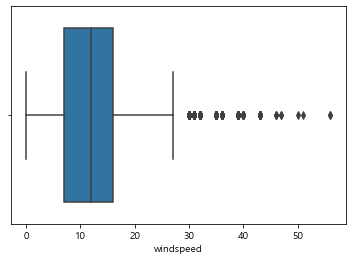

In [18]:
sns.boxplot(y = tmp, data = df, orient = 'h')

In [19]:
# IQR 활용
q1 = df[tmp].quantile(.25)
q3 = df[tmp].quantile(.75)
iqr = q3-q1
min_iqr = q1 - 1.5 * iqr
max_iqr = q3 + 1.5 * iqr
min_from_all = df[tmp].min()
max_from_all = df[tmp].max()
if (min_iqr < min_from_all) :
    min_iqr = min_from_all
if (max_iqr > max_from_all) :
    max_iqr = max_from_all

outlier = df[(df[tmp] < min_iqr ) | (df[tmp] > max_iqr)] # 이상치 조회
outlier_index = outlier.index
print(outlier.shape)
outlier

(427, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
42,2011-01-02 19:00:00,A,0,0,1,13.12,14.395,42,30,1,29,30
175,2011-01-08 14:00:00,A,0,0,1,8.20,8.335,32,32,12,83,95
176,2011-01-08 15:00:00,A,0,0,1,8.20,8.335,32,30,5,69,74
177,2011-01-08 16:00:00,A,0,0,1,7.38,6.820,29,30,8,68,76
178,2011-01-08 17:00:00,A,0,0,1,6.56,6.060,37,36,5,64,69
...,...,...,...,...,...,...,...,...,...,...,...,...
10682,2012-12-11 12:00:00,D,0,1,2,14.76,15.910,53,30,13,213,226
10852,2012-12-18 14:00:00,D,0,1,1,18.86,22.725,47,30,56,191,247
10853,2012-12-18 15:00:00,D,0,1,1,18.86,22.725,44,32,28,218,246
10854,2012-12-18 16:00:00,D,0,1,1,18.04,21.970,41,31,40,323,363


##### min/max값으로 보정

In [20]:
df.loc[(df[tmp] < min_iqr ),tmp] = min_iqr # 이상치 보정 - 하한치로 보정
df.loc[(df[tmp] > max_iqr ),tmp] = max_iqr # 이상치 보정 - 상한치로 보정

##### 이상치 제거

In [21]:
df = df.drop(outlier_index, axis=0)
df.shape

(10459, 12)

### 요약데이터로 변환

In [22]:
df.groupby('season').aggregate({'datetime':'count','temp': 'min', 'windspeed':np.mean, 'count': np.sum})

,datetime,temp,windspeed,count
season,,,,
A,2480,0.82,12.610484,285485
B,2618,9.84,12.132544,559432
C,2686,15.58,10.737528,625673
D,2675,5.74,10.885607,528522


### 파생변수 생성

In [29]:
cond1 = (today-df['datetime']) >= pd.Timedelta('3000 days')
cond2 = ((today-df['datetime']) < pd.Timedelta('3000 days'))&((today-df['datetime']) >= pd.Timedelta('2000 days'))
cond3 = (today-df['datetime']) < pd.Timedelta('2000 days')

df.loc[cond1, 'Recency'] = 1
df.loc[cond2, 'Recency'] = 2
df.loc[cond3, 'Recency'] = 3

In [30]:
# Frequency
df.loc[df['count'] <= 10, 'Frequency'] = 1
df.loc[(df['count'] > 10)&(df['count']<=20), 'Frequency'] = 2
df.loc[df['count'] >20, 'Frequency'] = 3

In [31]:
# Monetary
df['Monetary'] = df['count'] * df['temp']

In [32]:
df['year'] = df['datetime'].map(lambda x: x.year)
df['month'] = df['datetime'].map(lambda x: x.month)
df['day'] = df['datetime'].map(lambda x: x.day)
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['minute'] = df['datetime'].map(lambda x: x.minute)

In [33]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Recency,Frequency,Monetary,year,month,day,hour,minute
0,2011-01-01 00:00:00,A,0,0,1,9.84,14.395,81,0.0,3,13,16,1.0,2.0,157.44,2011,1,1,0,0
1,2011-01-01 01:00:00,A,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,3.0,360.80,2011,1,1,1,0
2,2011-01-01 02:00:00,A,0,0,1,9.02,13.635,80,0.0,5,27,32,1.0,3.0,288.64,2011,1,1,2,0


### 데이터 마트 DQ Check, 변수선택 및 EDA
#### DQ Check

In [34]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'Recency', 'Frequency', 'Monetary', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [35]:
col_num = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'Monetary']
col_cat = ['season', 'holiday', 'workingday', 'Recency', 'Frequency']

In [36]:
DA3 = DA(df[col_num])
DA3

,total,count,missing,mean,median,std,variance,skewness,kurtosis,min,5%,10%,25%,50%,75%,90%,95%,max
weather,10459.0,10459.0,0,1.42,1.00,0.63,0.40,1.24,0.39,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00
temp,10459.0,10459.0,0,20.30,20.50,7.79,60.62,-0.00,-0.92,0.82,8.20,9.84,13.94,20.50,26.24,30.34,32.80,41.00
atemp,10459.0,10459.0,0,23.76,24.24,8.42,70.89,-0.09,-0.86,0.76,10.60,12.12,16.66,24.24,31.06,34.09,36.36,45.46
humidity,10459.0,10459.0,0,62.47,62.00,19.01,361.46,-0.10,-0.73,0.00,32.00,37.00,48.00,62.00,78.00,88.00,93.00,100.00
windspeed,10459.0,10459.0,0,11.57,11.00,6.92,47.89,0.14,-0.55,0.00,0.00,0.00,7.00,11.00,16.00,22.00,23.00,27.00
casual,10459.0,10459.0,0,35.90,17.00,49.89,2488.45,2.50,7.57,0.00,0.00,1.00,4.00,17.00,48.00,94.00,141.00,367.00
registered,10459.0,10459.0,0,155.24,118.00,151.29,22885.98,1.53,2.63,0.00,4.00,7.00,35.00,118.00,223.00,354.00,464.00,886.00
count,10459.0,10459.0,0,191.14,144.00,181.35,32884.71,1.24,1.30,1.00,5.00,9.00,41.00,144.00,284.50,452.00,563.00,977.00
Monetary,10459.0,10459.0,0,4428.92,2617.44,5022.60,25224070.35,1.66,2.90,0.82,63.88,139.40,603.52,2617.44,6510.80,11640.23,15140.73,30157.14


In [37]:
DA4 = DA_cat(df, col_cat)
DA4

,col_nm,class,count,ratio
0,season,A,2480,0.24
1,season,B,2618,0.25
2,season,C,2686,0.26
3,season,D,2675,0.26
4,holiday,0,10164,0.97
5,holiday,1,295,0.03
6,workingday,0,3342,0.32
7,workingday,1,7117,0.68
8,Recency,1,9119,0.87
9,Recency,2,1340,0.13


#### 변수 제외

In [38]:
df = df.drop(columns = ['Frequency'], axis=1)

#### EDA

<AxesSubplot:xlabel='season', ylabel='windspeed'>

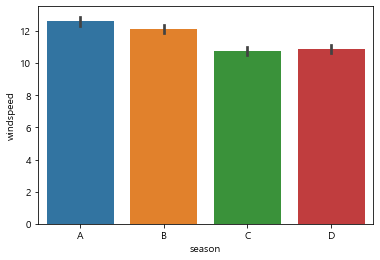

In [39]:
# 범주형 X별 y의 평균
sns.barplot(x ='season', y = 'windspeed', data = df)

<AxesSubplot:xlabel='count', ylabel='holiday'>

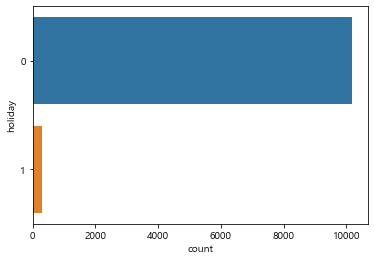

In [40]:
# 범주형(또는 가지수가 많지 않은 연속형) 변수의 데이터별 count
sns.countplot(y = 'holiday', data = df)

### 종속변수 분포 확인 및 전처리

<AxesSubplot:ylabel='Frequency'>

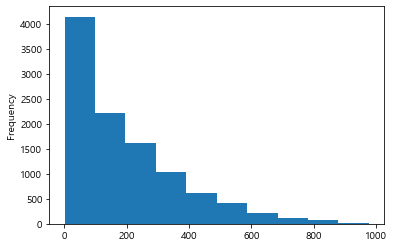

In [41]:
df['count'].plot(kind='hist')

In [42]:
df['count'] = np.log1p(df['count']) # inverse 는 np.expm1()

<AxesSubplot:ylabel='Frequency'>

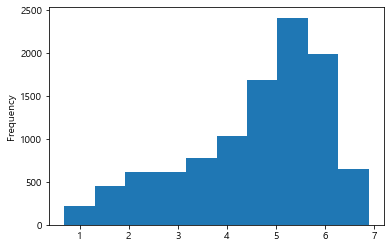

In [43]:
df['count'].plot(kind='hist')

### 범주형 변수 더미화

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10459 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10459 non-null  datetime64[ns]
 1   season      10459 non-null  object        
 2   holiday     10459 non-null  int64         
 3   workingday  10459 non-null  int64         
 4   weather     10459 non-null  int32         
 5   temp        10459 non-null  float64       
 6   atemp       10459 non-null  float64       
 7   humidity    10459 non-null  int32         
 8   windspeed   10459 non-null  float64       
 9   casual      10459 non-null  int32         
 10  registered  10459 non-null  int32         
 11  count       10459 non-null  float64       
 12  Recency     10459 non-null  float64       
 13  Monetary    10459 non-null  float64       
 14  year        10459 non-null  int64         
 15  month       10459 non-null  int64         
 16  day         10459 non-

In [45]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Recency,Monetary,year,month,day,hour,minute
0,2011-01-01 00:00:00,A,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,1.0,157.44,2011,1,1,0,0
1,2011-01-01 01:00:00,A,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,1.0,360.80,2011,1,1,1,0
2,2011-01-01 02:00:00,A,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,1.0,288.64,2011,1,1,2,0


In [46]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('count ~ season+ holiday+ workingday+ weather+ temp+atemp+ humidity+ windspeed+\
casual+ registered+ Recency+ Monetary+ year+ month+ day+ hour+ minute', data=df, return_type='dataframe')

### VIF 확인 필요 (y값 섞여들어가지 않게 주의!!)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,2.357161e+07,Intercept
1,4.984052e+00,season[T.B]
2,1.414252e+01,season[T.C]
3,2.612480e+01,season[T.D]
4,1.088440e+00,holiday
5,1.431576e+00,workingday
6,1.250423e+00,weather
7,4.605807e+01,temp
8,3.972747e+01,atemp
9,1.698243e+00,humidity


In [48]:
X = X.drop(columns = ['temp'])

In [49]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,2.353896e+07,Intercept
1,4.927431e+00,season[T.B]
2,1.384945e+01,season[T.C]
3,2.612426e+01,season[T.D]
4,1.087280e+00,holiday
5,1.425810e+00,workingday
6,1.247552e+00,weather
7,3.858072e+00,atemp
8,1.689671e+00,humidity
9,1.130916e+00,windspeed


### train, test split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [53]:
# 컬럼명 다시 붙여주기
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

### 군집화 수행

In [54]:
# X_train_scale, X_test_scale, y_train, y_test가 현재 변수

from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1, 11) :
        km = KMeans(n_clusters=i, init ='k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()

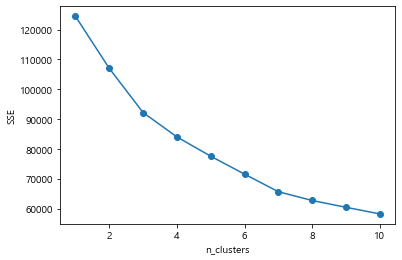

In [55]:
elbow(X_train_scale)

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(X):
    si = [] # 실루엣계수
    for i in range(2,11): # cluster가 2개인것 부터 10개까지!!!!
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        si.append(silhouette_score(X, km.labels_))
    print(np.round(si,3))
sil(X_train_scale)

[0.148 0.176 0.178 0.188 0.191 0.209 0.201 0.198 0.187]


#### 군집 수 직접 지정해서 군집화

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(X_train_scale)

KMeans(n_clusters=4, random_state=0)

### 군집화 결과 프로파일링

In [58]:
# 스케일링 풀고 프로파일링

df_profile = pd.DataFrame(scaler.inverse_transform(X_train_scale), columns = X_train.columns)
df_profile['kmeans'] = kmeans.labels_

<AxesSubplot:xlabel='kmeans', ylabel='atemp'>

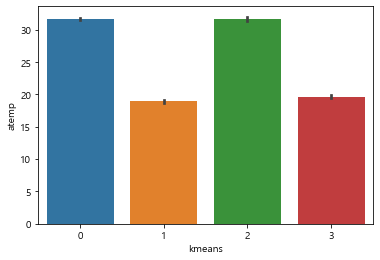

In [59]:
sns.barplot(df_profile['kmeans'], df_profile['atemp'])

<AxesSubplot:xlabel='kmeans', ylabel='windspeed'>

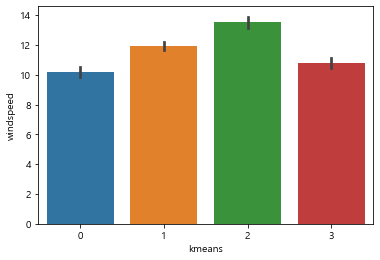

In [60]:
sns.barplot(df_profile['kmeans'], df_profile['windspeed'])

### 군집화 결과를 새로운 컬럼으로 추가(train, test 모두 수행)

In [61]:
X_train_scale['kmeans'] = kmeans.labels_

In [62]:
kmeans_test = kmeans.predict(X_test_scale)
X_test_scale['kmeans'] = kmeans_test

### 모델링

In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
models = []
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Huber', HuberRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('KernelRidge', KernelRidge()))
models.append(('MLP', MLPRegressor()))
models.append(('SVR', SVR()))

In [65]:
models

[('Ridge', Ridge()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('Huber', HuberRegressor()),
 ('DT', DecisionTreeRegressor()),
 ('RF', RandomForestRegressor()),
 ('KNN', KNeighborsRegressor()),
 ('KernelRidge', KernelRidge()),
 ('MLP', MLPRegressor()),
 ('SVR', SVR())]

In [66]:
num_folds = 5
seed = 7

In [67]:
names = []
results = []

kfold = KFold(n_splits = num_folds, shuffle = True, random_state=seed)

for name, model in models:
    score = cross_val_score(model, X_train_scale, y_train, cv = kfold)
    names.append(name)
    results.append(score)
    print(name, score.mean().round(3))

Ridge 0.784
Lasso 0.141
ElasticNet 0.465


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d

Huber 0.769
DT 0.999


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

RF 1.0
KNN 0.808
KernelRidge 0.186


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimi

MLP 0.994


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d

SVR 0.927


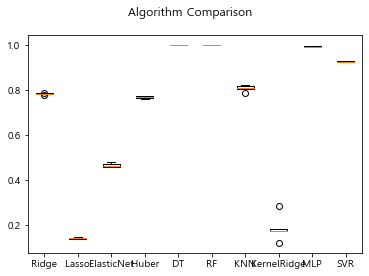

In [68]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

============ 여기는 GridSearchCV 참고 내용

In [ ]:
models = []
params = []

In [ ]:
model = ('Ridge', Ridge())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]
}

models.append(model)
params.append(param)

In [ ]:
model = ('Lasso', Lasso())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0]
}

models.append(model)
params.append(param)

In [ ]:
model = ('ElasticNet', ElasticNet())
param = {
    'alpha': [0.1, 0.3, 0.5, 1.0, 3.0, 5.0, 10.0],
    'l1_ratio': [0.3, 0.5, 0.7]
}

models.append(model)
params.append(param)

In [ ]:
model = ('HuberReg', HuberRegressor())
param = {
    'alpha': [0.0001, 0.001, 0.01]
}

models.append(model)
params.append(param)

In [ ]:
model = ('CART', DecisionTreeRegressor())
param = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [0.02, 0.05]
}

models.append(model)
params.append(param)

In [ ]:
model = ('RandomForest', RandomForestRegressor())
param = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'max_features': [6, 7, 8, 9, 10]
}

models.append(model)
params.append(param)

In [ ]:
model = ('KNN', KNeighborsRegressor())
param = {
    'KNN__n_neighbors': [5, 10, 15, 20, 25, 30],
    'KNN__weights': ['uniform', 'distance']
}

models.append(model)
params.append(param)

In [ ]:
model = ('KernelRidge', KernelRidge())
param = [
    {'kernel': ['linear'], 'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]},
    {'kernel': ['rbf'], 'alpha': [0.01, 0.05, 0.1, 0.5, 1.0], 'gamma': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]}
]

models.append(model)
params.append(param)

In [ ]:
model = ('MLP', MLPRegressor())
param = {
    'hidden_layer_sizes': [(50, ), (100, ), (50, 50), (100, 100)],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.001, 0.005],
    'max_iter': [200, 300, 400]
}

models.append(model)
params.append(param)

In [ ]:
model = ('SVR', SVR())
param = [
    {'kernel': ['linear'], 'C': [1.0, 10.0, 50.0, 100.0]},
    {'kernel': ['rbf'], 'C': [1.0, 10.0, 50.0, 100.0], 'gamma': [0.01, 0.05, 0.1, 0.5, 1.0]},
    {'kernel': ['poly'], 'C': [1.0, 10.0, 50.0, 100.0], 'degree': [3, 4, 5]}
]

models.append(model)
params.append(param)

### 파라미터 튜닝 및 최종 모델 선정

In [69]:
model = RandomForestRegressor()

n_estimators_set = [50, 60, 70, 80, 90, 100]
max_features_set = [6, 7, 8, 9, 10]
param_grid = dict(n_estimators = n_estimators_set,
                 max_features = max_features_set)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train_scale, y_train)
print('Best : %f using %s' % (grid_result.best_score_, grid_result.best_params_))

a = grid_result.cv_results_

for i in range(len(a['rank_test_score'])):
    print('%f (%f) with: %r' %(a['mean_test_score'][i], a['std_test_score'][i], a['params'][i]))

# for params, mean_score, scores in grid_result.cv_results_:  ## 얘 에러난다
#     print('%f (%f) with: %r' %(mean_test_score.mean(), std_test_score.mean(), params))

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\50008313\AppData\Local\Continuum\anacond

Best : 0.999598 using {'max_features': 10, 'n_estimators': 100}
0.998957 (0.000137) with: {'max_features': 6, 'n_estimators': 50}
0.999019 (0.000113) with: {'max_features': 6, 'n_estimators': 60}
0.999029 (0.000117) with: {'max_features': 6, 'n_estimators': 70}
0.998965 (0.000148) with: {'max_features': 6, 'n_estimators': 80}
0.999052 (0.000129) with: {'max_features': 6, 'n_estimators': 90}
0.999112 (0.000085) with: {'max_features': 6, 'n_estimators': 100}
0.999214 (0.000063) with: {'max_features': 7, 'n_estimators': 50}
0.999195 (0.000172) with: {'max_features': 7, 'n_estimators': 60}
0.999237 (0.000089) with: {'max_features': 7, 'n_estimators': 70}
0.999269 (0.000129) with: {'max_features': 7, 'n_estimators': 80}
0.999222 (0.000120) with: {'max_features': 7, 'n_estimators': 90}
0.999303 (0.000089) with: {'max_features': 7, 'n_estimators': 100}
0.999365 (0.000087) with: {'max_features': 8, 'n_estimators': 50}
0.999385 (0.000048) with: {'max_features': 8, 'n_estimators': 60}
0.999378 (

In [70]:
fine_tuned_RF = grid_result.best_estimator_
print('best params: ', grid_result.best_params_)
fine_tuned_RF.feature_importances_

best params:  {'max_features': 10, 'n_estimators': 100}


array([0.00000000e+00, 4.41366774e-05, 2.90677062e-04, 3.73373685e-05,
       1.18094802e-05, 4.87905776e-04, 5.48196586e-05, 5.18090942e-03,
       1.24890030e-03, 1.74106909e-04, 5.01670197e-02, 5.53148792e-01,
       6.36465645e-05, 2.93267652e-01, 2.47691833e-04, 1.06854462e-03,
       1.99304763e-04, 8.69605188e-02, 0.00000000e+00, 7.34622774e-03])

In [71]:
pd.DataFrame({'col':X_train_scale.columns, 'FI':fine_tuned_RF.feature_importances_}).sort_values('FI', ascending=False)

,col,FI
11,registered,0.553149
13,Monetary,0.293268
17,hour,0.086961
10,casual,0.050167
19,kmeans,0.007346
7,atemp,0.005181
8,humidity,0.001249
15,month,0.001069
5,workingday,0.000488
2,season[T.C],0.000291


<AxesSubplot:>

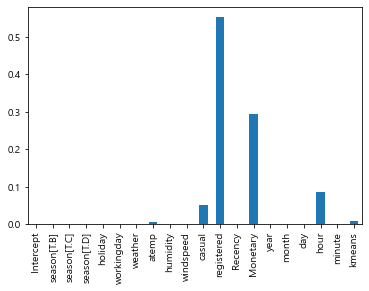

In [72]:
importances = pd.Series(fine_tuned_RF.feature_importances_, index=X_train_scale.columns)
importances.plot(kind='bar')

### Test set 활용하여 예측 수행

In [73]:
y_pred = fine_tuned_RF.predict(X_test_scale)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### R^2

In [75]:
r2 = r2_score(y_test, y_pred)
r2

0.9996783552736327

#### MSE

In [76]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0006309614666180469

#### RMSE

In [77]:
rmse = np.sqrt(mse)
rmse

0.025118946367593663

#### MAE

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.016405136296152333

#### MAPE

In [79]:
def mp(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs(y_test - y_pred)/y_test) * 100
# 평균 절대 백분율 오차(MAPE)는 정확도를 오차의 백분율로 표시합니다.
# MAPE는 백분율이기 때문에 다른 정확도 측도 통계량보다 더 쉽게 이해할 수 있습니다. 
# 예를 들어 MAPE가 5이면 예측 값은 평균 5% 벗어납니다

In [80]:
mape = mp(y_test, y_pred)
mape

47.99053628519589